In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:
#load the dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [3]:
#create data dataframe
df=pd.DataFrame(data)
df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [4]:
# Assign column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df.columns = column_names
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [5]:
#target dataframe
target = raw_df.values[1::2, 2]
target=pd.DataFrame(target)
target.head()

0
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [6]:
#assign column name
column_names=['MEDV']
target.columns=column_names
target.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [7]:
print(df.isnull().sum())
print('\n',target.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

 MEDV    0
dtype: int64


In [8]:
#create dataframe for the whole data
data_df=pd.concat([df,target],axis=1)
data_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

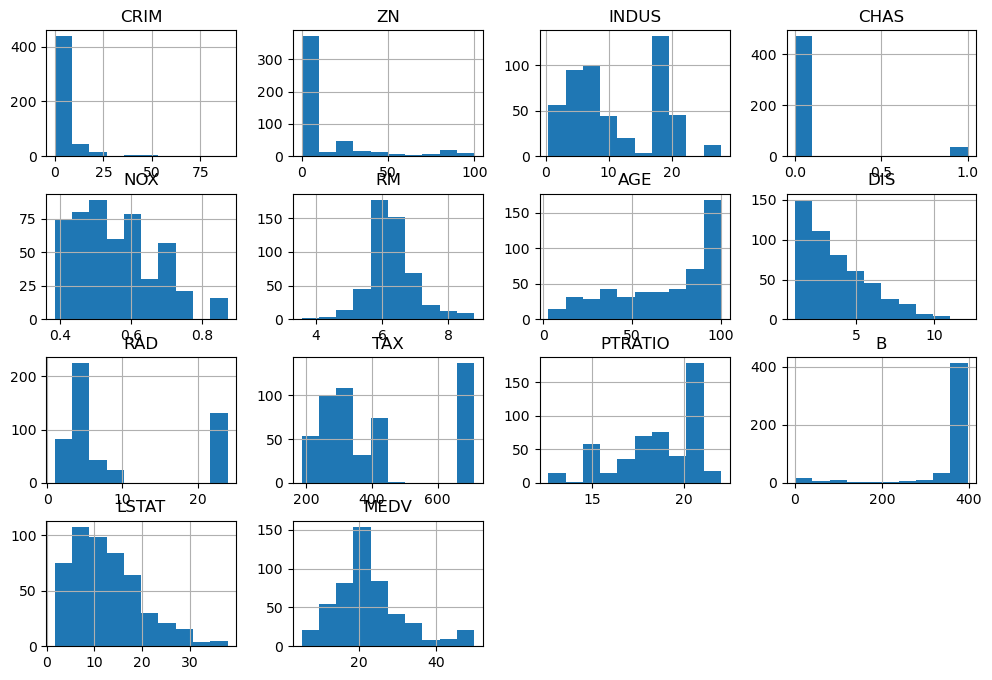

In [9]:
# Visualize the data using histograms
data_df.hist(figsize=(12, 8))
plt.show()



In [10]:
# Visualize the data using scatter plots
plt.scatter(data_df['RM'], data_df['MEDV'])
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()



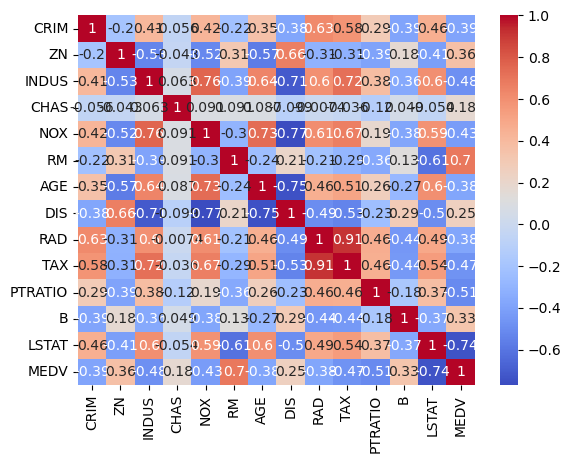

In [11]:
# Visualize the data using a correlation matrix heatmap
corr_matrix = data_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
target=np.ravel(target)

In [13]:
#split the dataset into training and testing
X=df
y=target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

#### Implement the regression models.

In [14]:
# Evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae, mse, rmse, r2

# 1. Simple Linear Regression (using RM feature)
simple_linear_reg = LinearRegression()
simple_linear_reg.fit(X_train[['RM']], y_train)
simple_linear_reg_metrics = evaluate_model(simple_linear_reg, X_test[['RM']], y_test)


# 2. Multiple Linear Regression
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)
multiple_linear_reg_metrics=evaluate_model(multiple_linear_reg,X_test,y_test)

# 3. Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
poly_reg_metrics=evaluate_model(poly_reg,X_test_poly,y_test)

# 4. Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_reg_metrics=evaluate_model(ridge_reg,X_test,y_test)

# 5. Lasso Regression
lasso_reg = Lasso(alpha=1.0)
lasso_reg.fit(X_train, y_train)
lasso_reg_metrics=evaluate_model(lasso_reg,X_test,y_test)

# 6. Support Vector Regression
svr_reg = SVR(kernel='linear')
svr_reg.fit(X_train, y_train)
svr_reg_metrics=evaluate_model(svr_reg,X_test,y_test)

# 7. Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=12)
dt_reg.fit(X_train, y_train)
dt_reg_metrics=evaluate_model(dt_reg,X_test,y_test)

# 8. Random Forest Regression
rf_reg = RandomForestRegressor(random_state=12)
rf_reg.fit(X_train, y_train)
rf_reg_metrics=evaluate_model(rf_reg,X_test,y_test)

# Evaluate all models
models = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest']
metrics = [simple_linear_reg_metrics, multiple_linear_reg_metrics, poly_reg_metrics, ridge_reg_metrics, lasso_reg_metrics, svr_reg_metrics, dt_reg_metrics, rf_reg_metrics]
results = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=models)
print(results)


                    MAE        MSE      RMSE        R2
Simple LR      4.521705  43.440405  6.590934  0.468361
Multiple LR    3.274079  20.558052  4.534099  0.748403
Polynomial LR  2.861486  15.739969  3.967363  0.807369
Ridge          3.286245  20.716816  4.551573  0.746460
Lasso          3.830387  29.131765  5.397385  0.643475
SVR            3.178466  21.266046  4.611512  0.739738
Decision Tree  2.883333  13.545784  3.680460  0.834222
Random Forest  2.264284  10.774133  3.282397  0.868142


In [16]:
# Random Forest example

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Regression model
rf_reg = RandomForestRegressor(random_state=12)

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf_reg, param_grid=param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best model and its evaluation metrics on the test set
best_rf_reg = grid_search_rf.best_estimator_
best_rf_reg_metrics = evaluate_model(best_rf_reg, X_test, y_test)


print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", -grid_search_rf.best_score_)



Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for Random Forest: -0.8689943141920292


In [17]:
# Evaluate all models
models = ['Simple LR', 'Multiple LR', 'Polynomial LR', 'Ridge', 'Lasso', 'SVR', 'Decision Tree', 'Random Forest','Tuned random forest']
metrics = [simple_linear_reg_metrics, multiple_linear_reg_metrics, poly_reg_metrics, ridge_reg_metrics, lasso_reg_metrics, svr_reg_metrics, dt_reg_metrics, rf_reg_metrics,best_rf_reg_metrics]
results = pd.DataFrame(metrics, columns=['MAE', 'MSE', 'RMSE', 'R2'], index=models)
print(results)

                          MAE        MSE      RMSE        R2
Simple LR            4.521705  43.440405  6.590934  0.468361
Multiple LR          3.274079  20.558052  4.534099  0.748403
Polynomial LR        2.861486  15.739969  3.967363  0.807369
Ridge                3.286245  20.716816  4.551573  0.746460
Lasso                3.830387  29.131765  5.397385  0.643475
SVR                  3.178466  21.266046  4.611512  0.739738
Decision Tree        2.883333  13.545784  3.680460  0.834222
Random Forest        2.264284  10.774133  3.282397  0.868142
Tuned random forest  2.264769  10.790516  3.284892  0.867942


In [18]:
# Visualize the performance of each model using a bar plot
results.plot(kind='bar', figsize=(12, 8), ylabel='Metric Value', title='Model Performance Comparison')
plt.show()

In [19]:
# Select the best model (e.g., tuned random forest)
best_model =best_rf_reg

# Fit the best model on the entire dataset
best_model.fit(X, y)


RandomForestRegressor(max_depth=20, random_state=12)

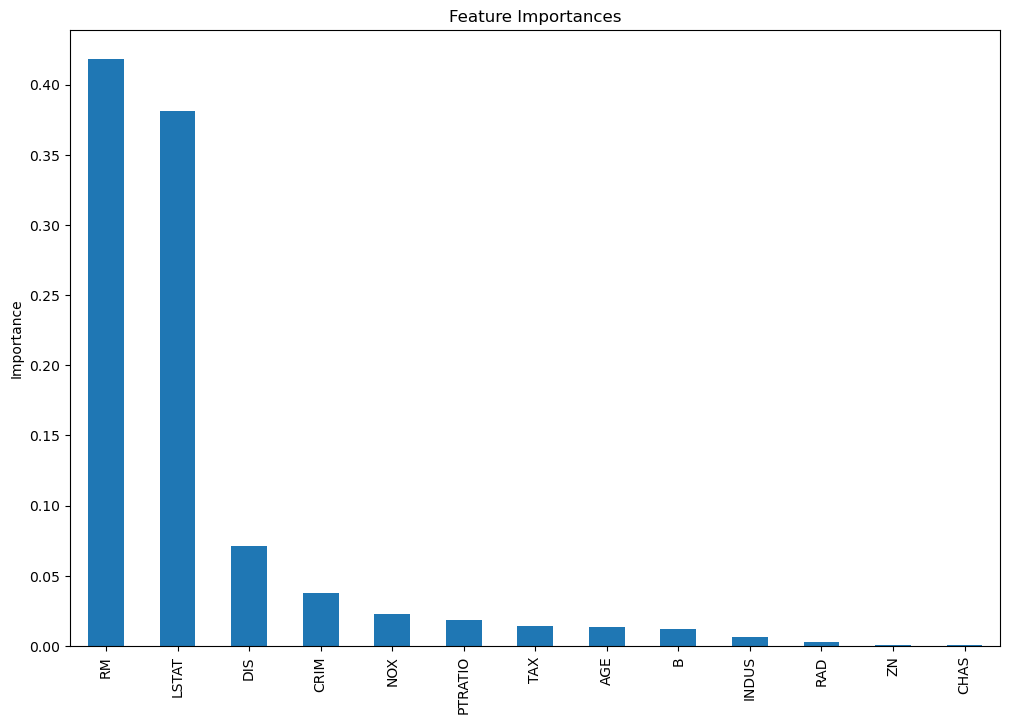

In [25]:
# Analyze feature importances for the Random Forest model
importances = best_model.feature_importances_
feature_importances = pd.Series(importances, index=df.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(12, 8), ylabel='Importance', title='Feature Importances')
plt.show()
